# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
sample_cities= cities
units= "imperial"
url= 'http://api.openweathermap.org/data/2.5/weather?q='
temp= []
humidity= []
cloudiness= []
windspeed= []
lat= []
lon= []
country= []
date= []
cities_found= []
record= 0

for cities in sample_cities:
    time.sleep(2)
    record= record + 1
    print(f'Processing record:{record} | {cities}')
    try:
        query_url= f"{url}{cities}&appid={weather_api_key}&units={units}"
        response= requests.get(query_url).json()
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_found.append(response['name'])
    except KeyError:
        print("City not found. Skipping...")







Processing record:1 | broome
Processing record:2 | husavik
Processing record:3 | carnarvon
Processing record:4 | mount gambier
Processing record:5 | mataura
Processing record:6 | georgetown
Processing record:7 | mitu
Processing record:8 | tuatapere
Processing record:9 | vaini
Processing record:10 | kapaa
Processing record:11 | bredasdorp
Processing record:12 | rikitea
Processing record:13 | albany
Processing record:14 | portland
Processing record:15 | bonoua
Processing record:16 | busselton
Processing record:17 | cape town
Processing record:18 | isangel
Processing record:19 | seoul
Processing record:20 | boa vista
Processing record:21 | san cristobal
Processing record:22 | belushya guba
City not found. Skipping...
Processing record:23 | tsihombe
City not found. Skipping...
Processing record:24 | lodwar
Processing record:25 | jamestown
Processing record:26 | umzimvubu
City not found. Skipping...
Processing record:27 | butaritari
Processing record:28 | tuktoyaktuk
Processing record:29 | 

Processing record:235 | kang
Processing record:236 | dunedin
Processing record:237 | san patricio
Processing record:238 | uvira
Processing record:239 | jiddah
City not found. Skipping...
Processing record:240 | atar
Processing record:241 | gornoye loo
Processing record:242 | kapit
Processing record:243 | malwan
City not found. Skipping...
Processing record:244 | barrow
Processing record:245 | amderma
City not found. Skipping...
Processing record:246 | arraial do cabo
Processing record:247 | dahuk
Processing record:248 | bantry
Processing record:249 | camacha
Processing record:250 | saint anthony
Processing record:251 | saleaula
City not found. Skipping...
Processing record:252 | varkaus
Processing record:253 | ilulissat
Processing record:254 | carutapera
Processing record:255 | teahupoo
Processing record:256 | talnakh
Processing record:257 | stephenville
Processing record:258 | narsaq
Processing record:259 | tidore
City not found. Skipping...
Processing record:260 | mahibadhoo
Processi

Processing record:463 | meyungs
City not found. Skipping...
Processing record:464 | ilka
City not found. Skipping...
Processing record:465 | culaman
Processing record:466 | stornoway
Processing record:467 | biala podlaska
Processing record:468 | severo-yeniseyskiy
Processing record:469 | sohag
Processing record:470 | panlaitan
Processing record:471 | whitianga
Processing record:472 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing record:473 | yerbogachen
Processing record:474 | lebu
Processing record:475 | mwingi
Processing record:476 | segou
Processing record:477 | mnogovershinnyy
Processing record:478 | markova
Processing record:479 | klaksvik
Processing record:480 | antofagasta
Processing record:481 | mildura
Processing record:482 | galle
Processing record:483 | praia da vitoria
Processing record:484 | asau
Processing record:485 | sechura
Processing record:486 | rath
Processing record:487 | juba
Processing record:488 | mattru
Processing record:489 | treinta y tres
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
countries_dict= {"Cities": cities_found,"Temp": temp, "Humidity":humidity, "Cloudiness":cloudiness,"Windspeed":windspeed,
                 "Lat":lat, "Lng":lon, "Country":country, "Date": date}

countries_df= pd.DataFrame(countries_dict)
countries_df

,Cities,Temp,Humidity,Cloudiness,Windspeed,Lat,Lng,Country,Date
0,Broome,26.64,73,1,1.99,42.2506,-75.8330,US,1641352647
1,Husavik,6.71,79,35,13.58,66.0449,-17.3389,IS,1641352649
2,Carnarvon,87.87,58,0,16.11,-24.8667,113.6333,AU,1641352652
3,Mount Gambier,60.71,94,90,21.85,-37.8333,140.7667,AU,1641352654
4,Mataura,56.48,66,100,5.73,-46.1927,168.8643,NZ,1641352656
...,...,...,...,...,...,...,...,...,...
545,Mana,75.70,86,57,7.38,5.6592,-53.7767,GF,1641354023
546,Cockburn Town,78.15,74,1,14.20,21.4612,-71.1419,TC,1641353869
547,Ardakān,41.38,47,49,6.44,32.3100,54.0175,IR,1641354028
548,Zhangye,28.08,28,9,2.33,38.9342,100.4517,CN,1641354030


In [5]:
countries_df.describe()

,Temp,Humidity,Cloudiness,Windspeed,Lat,Lng,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,49.324327,74.830909,61.660000,8.040055,19.329763,16.231904,1.641353e+09
std,31.154430,19.059836,38.780298,6.195085,33.347839,90.459421,4.105347e+02
min,-56.540000,11.000000,0.000000,0.000000,-54.800000,-175.200000,1.641352e+09
25%,30.750000,66.000000,20.000000,3.360000,-7.831675,-64.222725,1.641353e+09
50%,58.145000,78.000000,76.000000,6.745000,22.690050,21.986600,1.641353e+09
75%,74.657500,89.000000,99.000000,11.147500,46.472525,91.097750,1.641354e+09
max,102.610000,100.000000,100.000000,45.480000,78.218600,179.316700,1.641354e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
max(countries_df['Humidity'])

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

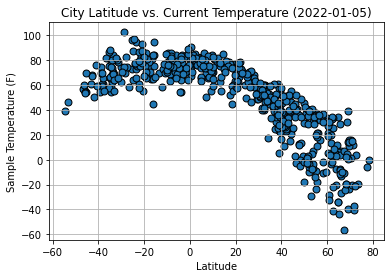

In [7]:
# pull out date the date was pulled
# credit to https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date
date_run= countries_df['Date'][0]
date_run= datetime.utcfromtimestamp(date_run).strftime('%Y-%m-%d')

countries_df.plot.scatter('Lat','Temp', title= f"City Latitude vs. Current Temperature ({date_run})",
                          xlabel="Latitude", ylabel="Sample Temperature (F)", grid=True,
                          edgecolor= 'black', s=48)

print()

This plot is investigating how temperature is correlated with latitude. 

## Latitude vs. Humidity Plot

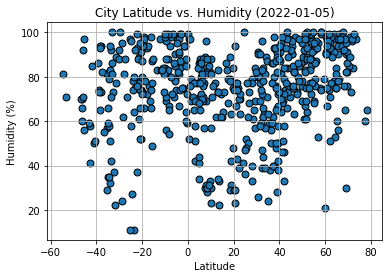

In [8]:
countries_df.plot.scatter('Lat','Humidity', s=48, edgecolor= 'black', grid=True,
                          title=f"City Latitude vs. Humidity ({date_run})", xlabel="Latitude", ylabel="Humidity (%)")

print()

This plot is investigating how humidity is correlated with latitude. 

## Latitude vs. Cloudiness Plot

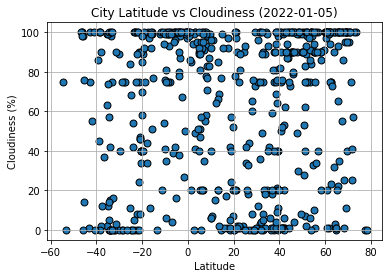

In [9]:
countries_df.plot.scatter('Lat','Cloudiness', s=48, edgecolor='black', grid=True, xlabel="Latitude", 
                          ylabel="Cloudiness (%)", title= f"City Latitude vs Cloudiness ({date_run})" )
print()

This plot is investigating how cloudiness is correlated with latitude. 

## Latitude vs. Wind Speed Plot

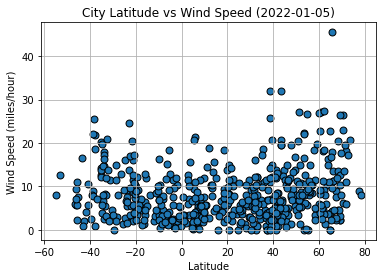

In [10]:
countries_df.plot.scatter('Lat','Windspeed', s=48, edgecolor= 'black', grid=True, ylabel= "Wind Speed (miles/hour)", 
                          xlabel= 'Latitude', title=f"City Latitude vs Wind Speed ({date_run})")

print()

This plot is investigating how windiness is correlated with latitude. 

## Linear Regression

In [11]:
countries_df
northern_df= countries_df.loc[countries_df['Lat'] > 0, :]
southern_df= countries_df.loc[countries_df['Lat'] < 0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r^2 value is: 0.7496301049484887


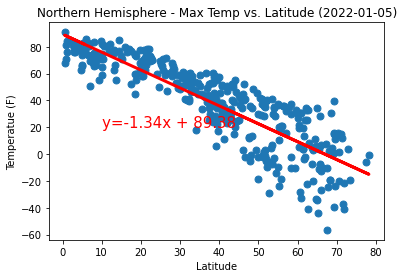

In [12]:
northern_df.plot.scatter('Lat','Temp', s=48, ylabel= "Temperatue (F)", xlabel= "Latitude", 
                         title= f"Northern Hemisphere - Max Temp vs. Latitude ({date_run})")

(slope, intercept, rvalue, pvalue, stderr)= linregress(northern_df['Lat'],northern_df['Temp'])

plt.plot(northern_df['Lat'], slope * northern_df['Lat'] + intercept, color='red', linewidth=3)

plt.annotate(f"y={round(slope,2)}x + {round(intercept,2)}", xy=(10,20), color='red', size=15 )

print(f"The r^2 value is: {rvalue**2}")

plt.show()

This plot illustrating norther hemisphere temperatures shows a strong negative correlation between increasingly northern latitudes and temperature. In other words, as we move away from the equator temperaturs go down. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r^2 value is: 0.14329655886240597


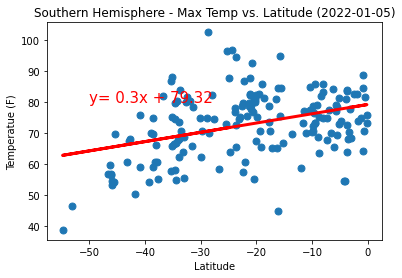

In [13]:
southern_df.plot.scatter('Lat','Temp', s=48, ylabel= "Temperatue (F)", xlabel= "Latitude", 
                         title= f"Southern Hemisphere - Max Temp vs. Latitude ({date_run})")

(slope, intercept, rvalue, pvalue, stderr)= linregress(southern_df['Lat'],southern_df['Temp'])

plt.plot(southern_df['Lat'],slope*southern_df['Lat'] + intercept, color='red', linewidth=3)

plt.annotate(f"y= {round(slope,2)}x + {round(intercept,2)}", xy=(-50,80), color='red', size=15)

print(f"The r^2 value is: {rvalue**2}")

plt.show()


This plot, which illustrates temperatures as a function of latitude in the southern hemisphere, demonstrates a somewhat strong positive correlation between increasingly northern latitudes and temperature. Said another way, temperatures are trending up as we move towards the equator. However, the correlation is not as strong as it was for the northern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r^2 value is: 0.15051115274327986



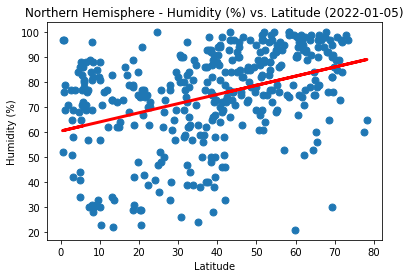

In [14]:
northern_df.plot.scatter('Lat','Humidity', s=48, xlabel='Latitude', ylabel= 'Humidity (%)',
                         title=f'Northern Hemisphere - Humidity (%) vs. Latitude ({date_run})')

(slope, intercept, rvalue, pvalue, stderr)= linregress(northern_df['Lat'],northern_df['Humidity'])

plt.plot(northern_df['Lat'], slope*northern_df['Lat'] + intercept, color='red', linewidth='3')

plt.annotate(f"y= {round(slope,2)}x + {round(intercept,2)}", xy=(40,15), color= "red", size=15 )

print(f"The r^2 value is: {rvalue**2}")

print()

This plot shows very little correlation between latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

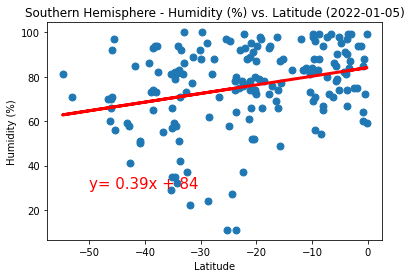

In [15]:
southern_df.plot.scatter('Lat','Humidity', s=48, xlabel='Latitude', ylabel= 'Humidity (%)',
                         title=f'Southern Hemisphere - Humidity (%) vs. Latitude ({date_run})')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Lat'],southern_df['Humidity'])

plt.plot(southern_df['Lat'], slope*southern_df['Lat'] + intercept, color='red', linewidth=3)

plt.annotate(f'y= {round(slope,2)}x + {round(intercept)}', xy=(-50,30), color='red', size=15)

plt.show()

This plot shows a very little correlation between latitude and humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r^2 value is: 0.017677586732051123



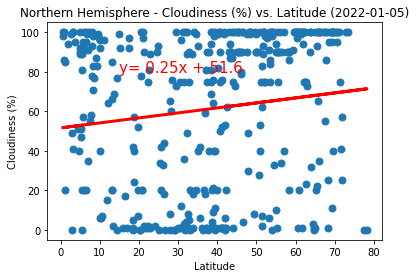

In [16]:
northern_df.plot.scatter('Lat', 'Cloudiness', s=48, xlabel= "Latitude", ylabel= 'Cloudiness (%)',
                         title=f'Northern Hemisphere - Cloudiness (%) vs. Latitude ({date_run})' )

(slope, intercept, rvalue, pvalue, stderr)= linregress(northern_df['Lat'],northern_df['Cloudiness'])

plt.plot(northern_df['Lat'], slope * northern_df['Lat'] + intercept, color='red', linewidth=3)

plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', xy=(15,80), color='red', size=15 )

print(f'The r^2 value is: {rvalue**2}')

print()

This plot shows very little correlation between cloudiness and latitudue.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r^2 value is: 0.10002695225776087



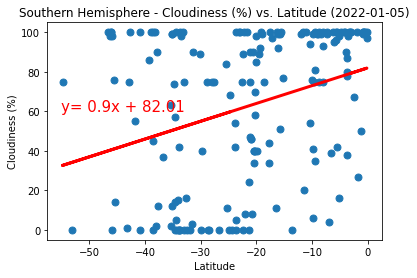

In [17]:
southern_df.plot.scatter('Lat', 'Cloudiness', s=48, xlabel= "Latitude", ylabel= 'Cloudiness (%)',
                         title=f'Southern Hemisphere - Cloudiness (%) vs. Latitude ({date_run})' )

(slope, intercept, rvalue, pvalue, stderr)= linregress(southern_df['Lat'],southern_df['Cloudiness'])

plt.plot(southern_df['Lat'], slope*southern_df['Lat'] + intercept, color='red', linewidth=3)

plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', color='red', size=15, xy= (-55,60))

print(f'The r^2 value is: {rvalue**2}' )

print()

This plot also shows very little correlation between cloudiness and latitudue.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r^2 value is: 0.07517687314268759



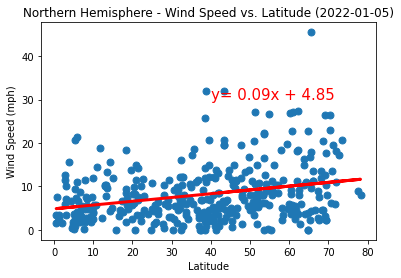

In [18]:
northern_df.plot.scatter('Lat','Windspeed', s=48, xlabel= "Latitude", ylabel= 'Wind Speed (mph)', 
                         title=f"Northern Hemisphere - Wind Speed vs. Latitude ({date_run})" )

(slope, intercept, rvalue, pvalue, stderr)= linregress(northern_df['Lat'],northern_df['Windspeed'])

plt.plot(northern_df['Lat'],slope*northern_df['Lat'] + intercept,color='red', linewidth=3)

plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', xy=(40,30), color='red', size=15)

print(f'The r^2 value is: {rvalue**2}')
             
print()

This plot shows very little correlation between windiness and latitudue.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r^2 value is: 0.08869502499065765


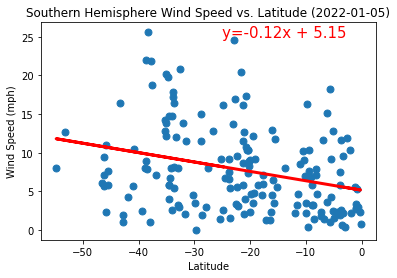

In [19]:
southern_df.plot.scatter('Lat','Windspeed', s=48, xlabel="Latitude", ylabel= "Wind Speed (mph)",
                        title= f"Southern Hemisphere Wind Speed vs. Latitude ({date_run})")

(slope, intercept, rvalue, pvalue, stderr)= linregress(southern_df['Lat'],southern_df['Windspeed'])

plt.plot(southern_df['Lat'],slope*southern_df['Lat'] + intercept, color='red', linewidth=3)

plt.annotate(f'y={round(slope,2)}x + {round(intercept,2)}', xy=(-25,25), color='red', size=15)

print(f'The r^2 value is: {rvalue**2}')

plt.show()

This plot also shows very little correlation between windiness and latitudue.

In [20]:
#output data to csv

countries_df.to_csv(output_data_file)
